In [116]:
pip install mataplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mataplotlib (from versions: none)
ERROR: No matching distribution found for mataplotlib


In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,8)})

In [118]:
df = pd.read_csv('CarPrice.csv')

## Inspect the Dataframe

In [119]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952.0,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049.0,ohc,four,141,mpfi,NaN,3.15,8.7,160,5300,19.0,25.0,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012.0,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217.0,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062.0,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19.0,25.0,22625.0


In [120]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,NaN,2548.0,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,NaN,NaN,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,NaN,48.8,2548.0,dohc,four,130,mpfi,3.47,NaN,9.0,111,5000,21.0,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,NaN,176.6,66.4,54.3,2824.0,ohc,five,136,mpfi,NaN,3.40,8.0,115,5500,18.0,22.0,17450.0


### Accessing rows and columns

In [121]:
"Converting columns to a list"
columns= df.columns
columns_as_list = columns.tolist()
columns_as_list

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [122]:
"Converting columns to a list"
columns_as_list = columns.tolist()
columns_as_list

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [123]:
"Acceesing rows and converting them into a list"
rows = df.index
rows

RangeIndex(start=0, stop=205, step=1)

In [124]:
rows.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


## Get the size of the Pandas dataframe

In [125]:
df.shape

(205, 26)

In [126]:
#Number of rows
df.shape[0]

205

In [127]:
#Number of columns
len(df.columns) 

26

In [128]:
#Number of entires in our data
df.size

5330

## Get Data Types of Pandas Dataframes

In [129]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          float64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg             float64
highwaympg          float64
price               float64
dtype: object

In [130]:
## accesing all the data with string values
df.select_dtypes(include = [object])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
5,audi fox,gas,std,two,sedan,fwd,front,ohc,five,mpfi
6,audi 100ls,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,audi 5000,gas,std,four,wagon,fwd,front,ohc,five,mpfi
8,audi 4000,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
9,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi


In [131]:
## Accesing all the numerical variables
set(df.columns) - set(df.select_dtypes(include = object).columns)

{'boreratio',
 'car_ID',
 'carheight',
 'carlength',
 'carwidth',
 'citympg',
 'compressionratio',
 'curbweight',
 'enginesize',
 'highwaympg',
 'horsepower',
 'peakrpm',
 'price',
 'stroke',
 'symboling',
 'wheelbase'}

### Summarizing the data

In [132]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,186.000000,193.000000,189.000000,189.000000,193.000000,205.000000,183.000000,196.000000,188.000000,205.000000,205.000000,196.000000,197.00000,205.000000
mean,103.000000,0.834146,98.671505,174.313990,65.974074,53.789418,2550.082902,126.907317,3.329235,3.259286,10.303298,104.117073,5125.121951,25.117347,30.86802,13276.710571
std,59.322565,1.245307,5.879428,12.272423,2.147714,2.455670,519.191984,41.642693,0.264167,0.317343,4.101689,39.544167,476.985643,6.492718,6.88631,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.00000,5118.000000
25%,52.000000,0.000000,94.500000,167.300000,64.200000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.700000,70.000000,4800.000000,19.000000,25.00000,7788.000000
50%,103.000000,1.000000,96.900000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.00000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.600000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,36.00000,16503.000000
max,205.000000,3.000000,115.600000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.00000,45400.000000


In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,186.0,98.671505,5.879428,86.60,94.50,96.90,102.40,115.60
carlength,193.0,174.313990,12.272423,141.10,167.30,173.20,183.10,208.10
carwidth,189.0,65.974074,2.147714,60.30,64.20,65.50,66.90,72.30
carheight,189.0,53.789418,2.455670,47.80,52.00,54.10,55.60,59.80
curbweight,193.0,2550.082902,519.191984,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,183.0,3.329235,0.264167,2.54,3.15,3.31,3.58,3.94
stroke,196.0,3.259286,0.317343,2.07,3.11,3.29,3.41,4.17


### Column CompanyName has both Company and Car name in it. So we will split this column

In [134]:
#Splitting company name from CarName column
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,NaN,2548.0,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,NaN,NaN,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,NaN,48.8,2548.0,dohc,four,130,mpfi,3.47,NaN,9.0,111,5000,21.0,27.0,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,NaN,176.6,66.4,54.3,2824.0,ohc,five,136,mpfi,NaN,3.40,8.0,115,5500,18.0,22.0,17450.0


In [135]:
df.tail()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952.0,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049.0,ohc,four,141,mpfi,NaN,3.15,8.7,160,5300,19.0,25.0,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012.0,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217.0,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470.0
204,205,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062.0,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19.0,25.0,22625.0


In [136]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Looking for invalid values in ComanyName

In [22]:
df.CompanyName = df.CompanyName.str.lower()

def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique() # this shows the correct Company names

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [137]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

# Fixing the Misspelled Company Names

In [138]:
# There are some spelling errors in CompanyName Column 
# Eg: Maxda -> Mazda etc.
df.CompanyName = df.CompanyName.str.lower()

def replace (a,b):
    df.CompanyName.replace(a,b, inplace = True)
    
replace_name('maxda', 'mazda')
replace_name('porcshce', 'porsche')
replace_name('toyouta', 'toyota')
replace_name('vokswagen', 'volkswagen')
replace_name('vw', 'volkswagen')

df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [139]:
# Checking for Duplicates
df.loc[df.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


# Data Visulization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


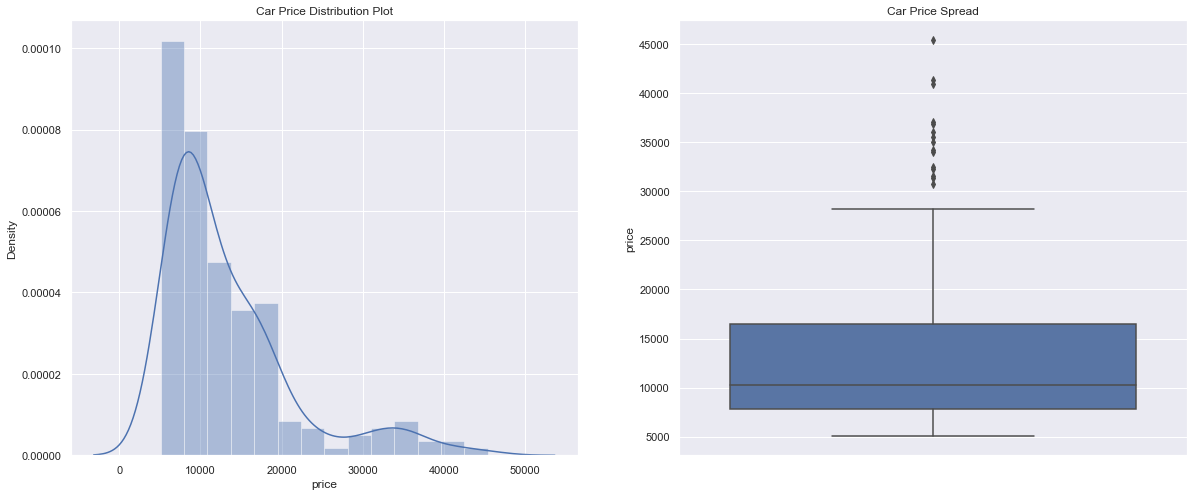

In [141]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot( y = df.price)

plt.show()

In [142]:
print(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


Inference:
1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000)
2. The significant difference between the mean and median of the price distribution
3. The data points are spread out from the mean, which indicates a high variance in car prices.

### Visualizing the Categorical Data

CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

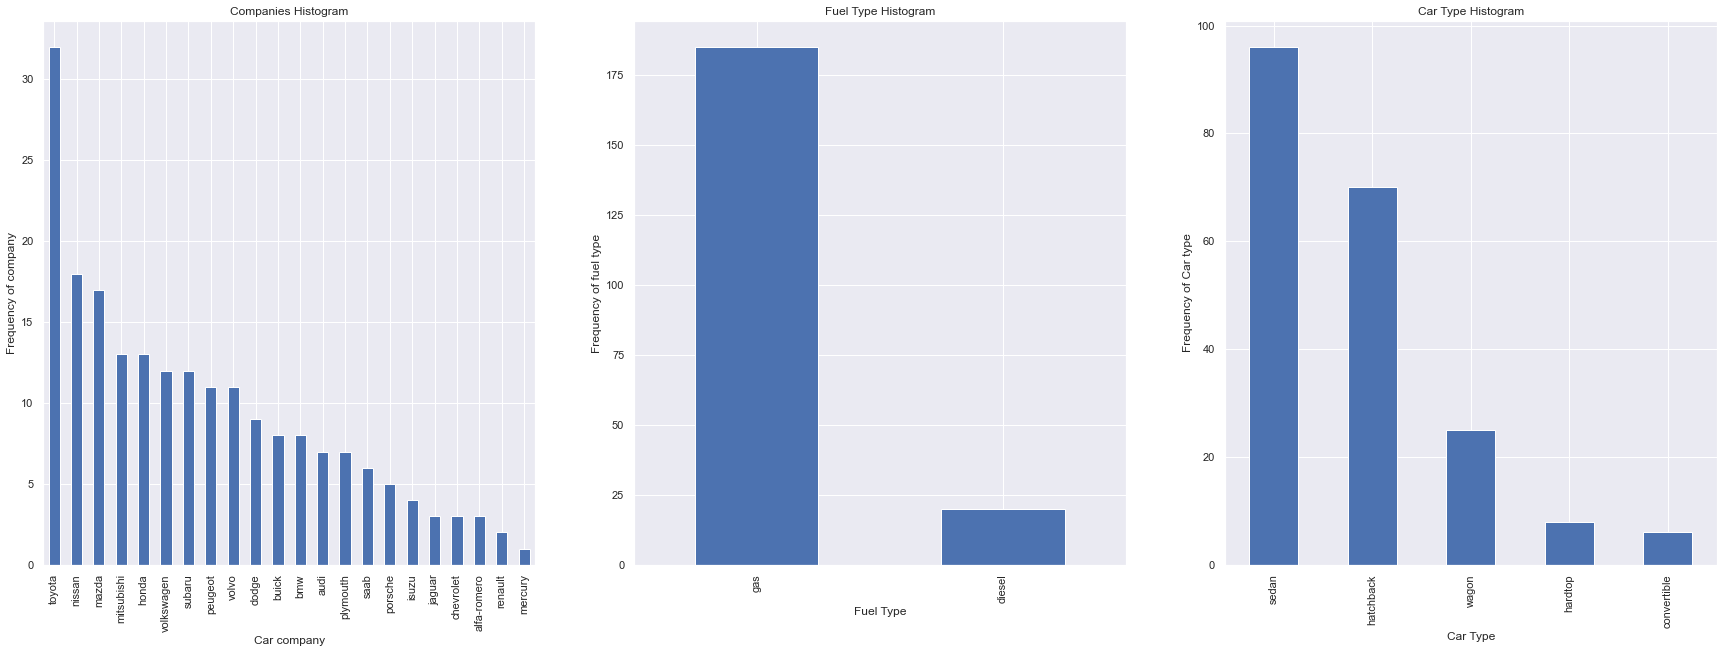

In [143]:
plt.figure(figsize=(30, 10))

plt.subplot(1,3,1)
plt1 = df.CompanyName.value_counts().plot(kind ='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df.fueltype.value_counts().plot(kind ='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df.carbody.value_counts().plot(kind ='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

Inference
1. Toyota seemed to be favored car company.
2. Number of gas fueled cars are more than diesel
3. sedan is the top car type prefered

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


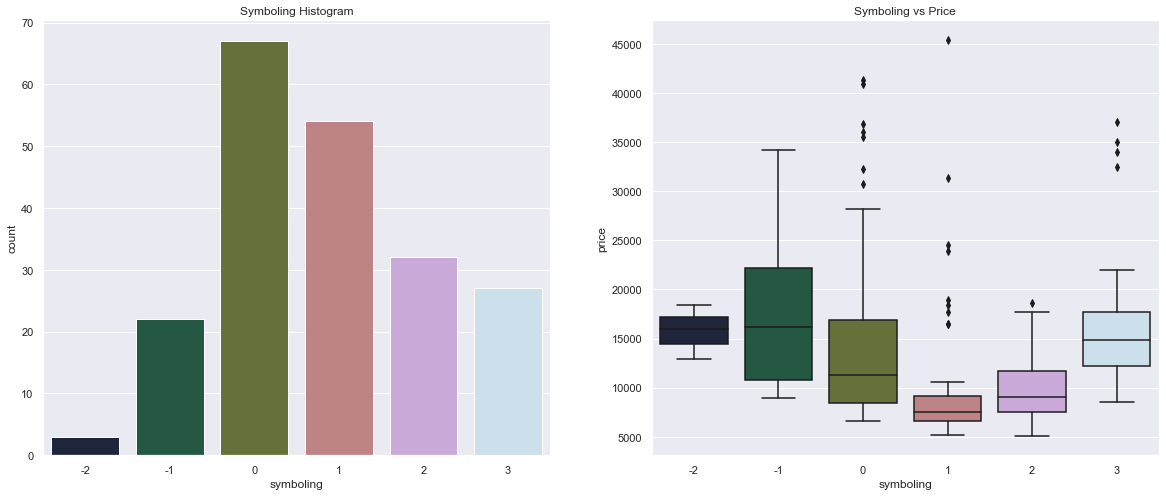

In [144]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(df.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

plt.show()

Inference
1. It seems  that the symbolizing with 0 and 1 values have high number of rows(i.e They are most sold)
2. The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symbolin 1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


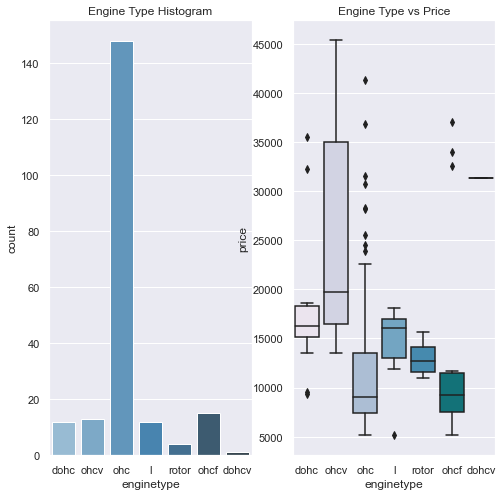

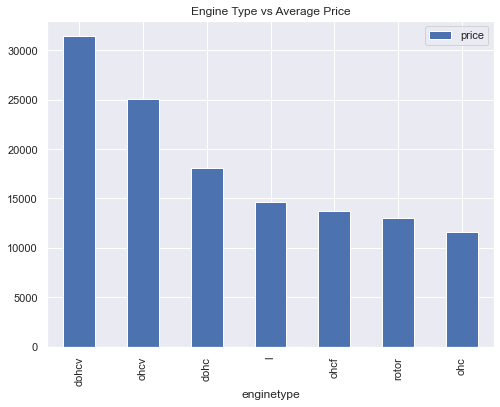

In [145]:
plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(df.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.enginetype, y=df.price, palette=("PuBuGn"))

plt.show()

jk = pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
jk.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

Inference:ohc 
1. Engine type seems to be most favored type.
2. ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

<Figure size 1800x432 with 0 Axes>

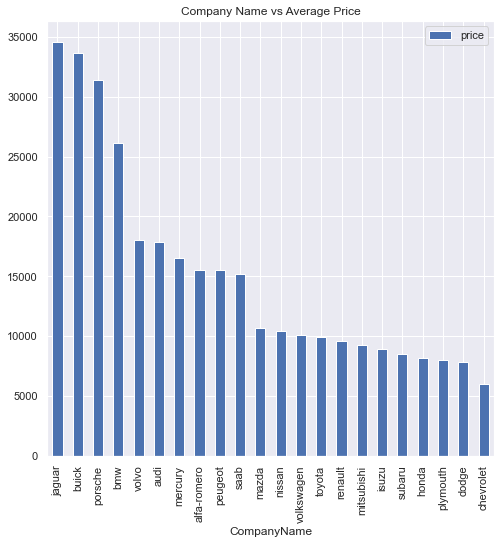

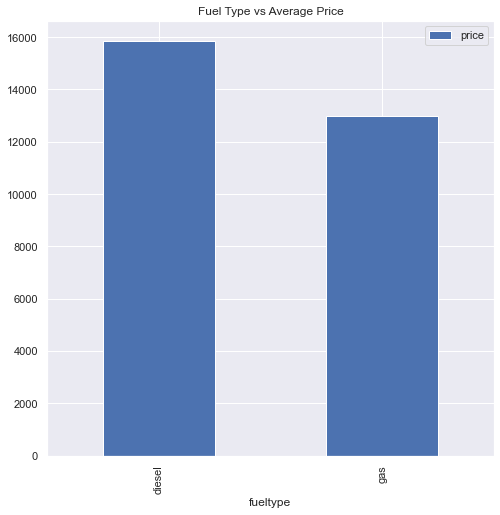

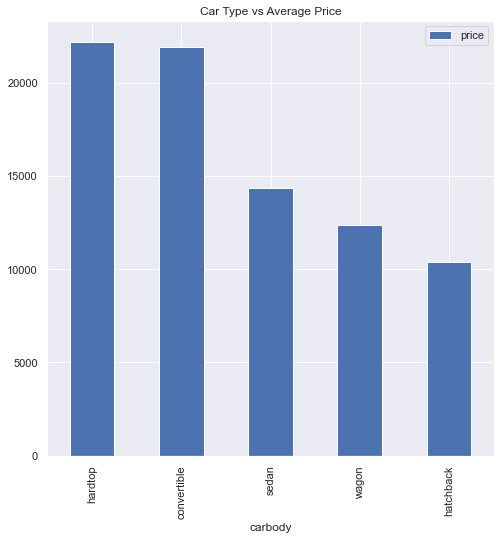

In [148]:
plt.figure(figsize=(25, 6))

jk = pd.DataFrame(df.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
jk.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

jk = pd.DataFrame(df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
jk.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

jk = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
jk.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

Inference:
1. Jaguar and Buick seem to have highest average price.
2. diesel has higher average price than gas.
3. hardtop and convertible have higher average price.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

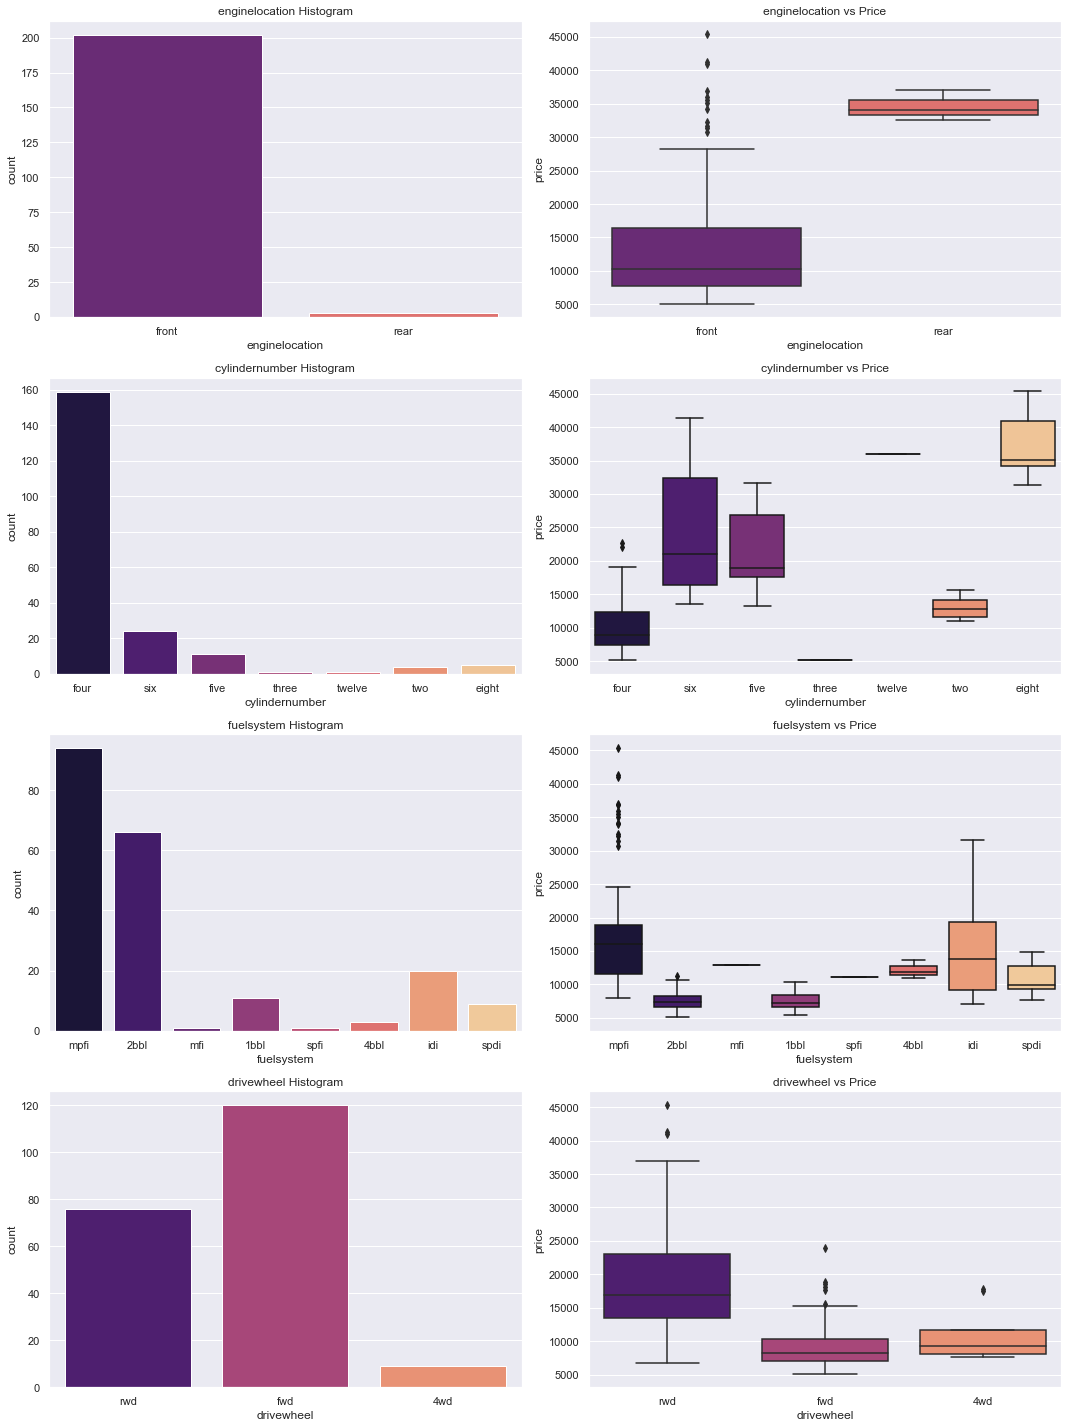

In [150]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(df[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=df[x], y=df.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

Inference :
1. Very few datapoints for enginelocation categories to make an inference.
2. Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
3. mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
4. A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

## Visualizing numerical data using scatter plots

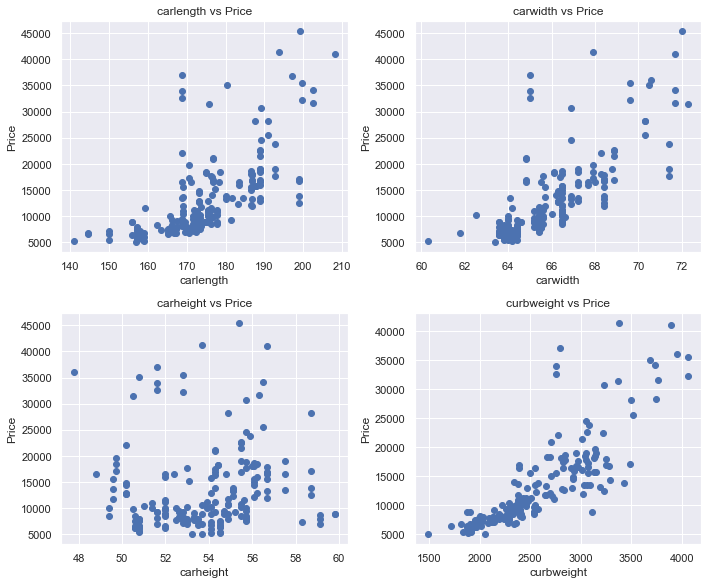

In [151]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


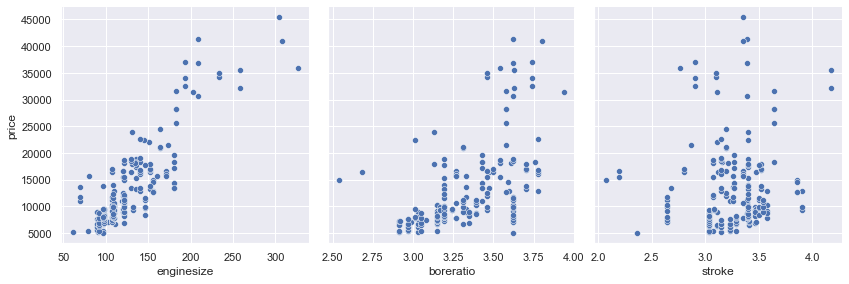

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


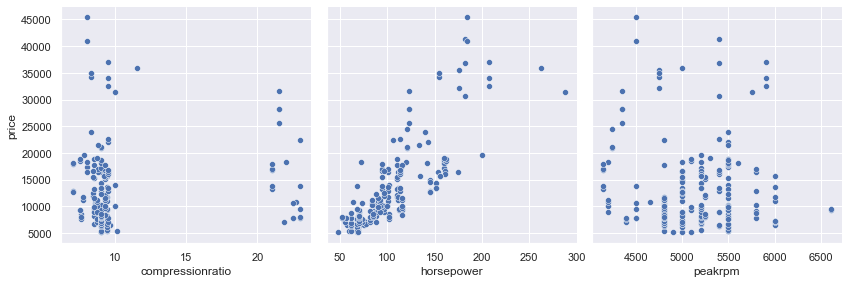

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


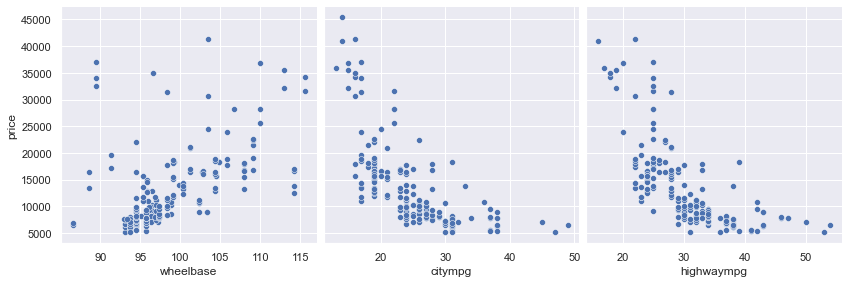

In [152]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

Inference :
1. enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
2. citympg, highwaympg - seem to have a significant negative correlation with price.

In [153]:
np.corrcoef(df['carlength'], df['carwidth'])[0, 1] #gives 

nan

In [154]:
#Fuel economy
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

In [155]:
#Binning the Car Companies based on avg prices of each Company.
df['price'] = df['price'].astype('int')
temp = df.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
df_bin=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=df_bin)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,NaN,2548.0,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,NaN,NaN,13495,NaN,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,NaN,48.8,2548.0,dohc,four,130,mpfi,3.47,NaN,9.0,111,5000,21.0,27.0,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,NaN,176.6,66.4,54.3,2824.0,ohc,five,136,mpfi,NaN,3.40,8.0,115,5500,18.0,22.0,17450,19.80,Medium


### Bivariate Analysis

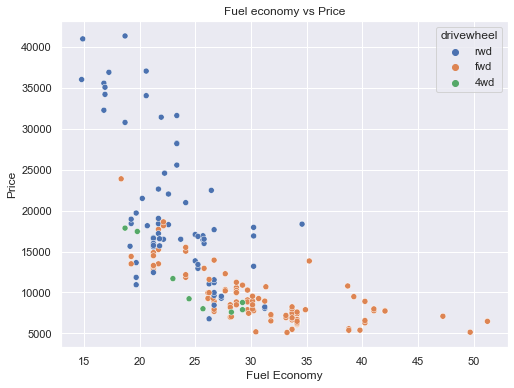

<Figure size 576x576 with 0 Axes>

In [156]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=df['fueleconomy'],y=df['price'],hue=df['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

Inference :
1. fueleconomy has an obvios negative correlation with price and is significant.

<Figure size 1800x432 with 0 Axes>

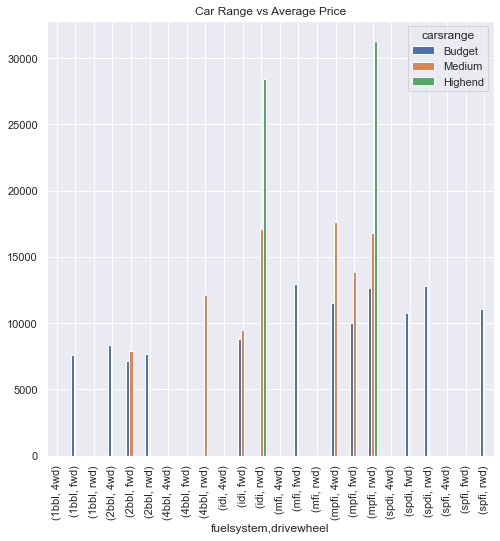

In [158]:
plt.figure(figsize=(25, 6))

jk = pd.DataFrame(df.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
jk.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

Inference :
1. High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem

#### List of significant variables after Visual analysis :
- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 

In [160]:
df_lr = df[['price', 'enginetype', 'cylindernumber', 'enginesize','horsepower', 
                    'fueleconomy', 'carsrange']]
df_lr.head()

,price,enginetype,cylindernumber,enginesize,horsepower,fueleconomy,carsrange
0,13495,dohc,four,130,111,NaN,Medium
1,16500,dohc,four,130,111,23.70,Medium
2,16500,ohcv,six,152,154,22.15,Medium
3,13950,ohc,four,109,102,26.70,Medium
4,17450,ohc,five,136,115,19.80,Medium


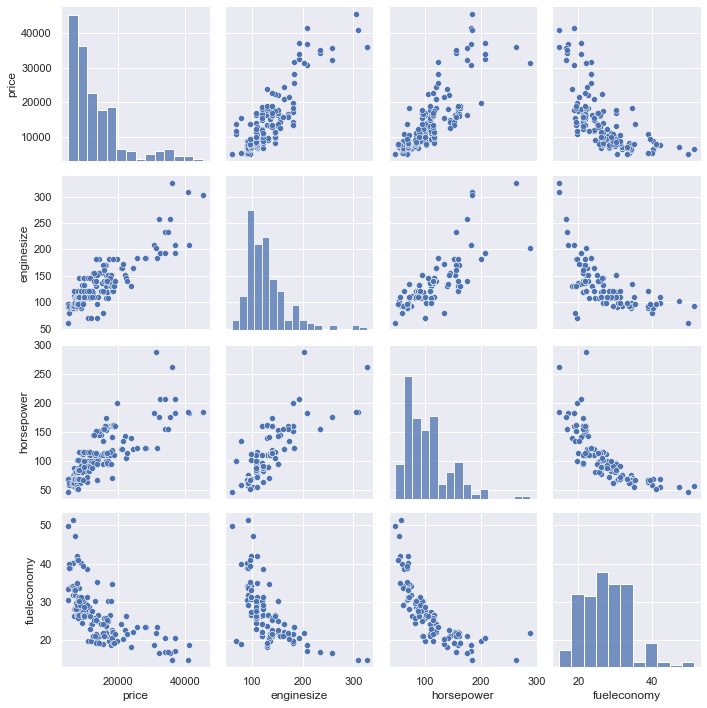

In [161]:
sns.pairplot(df_lr)
a = plt.show()
a

## Dummy Variable

In [164]:
# Defining the map function
def dummies(x,jk):
    temp = pd.get_dummies(jk[x], drop_first = True)
    jk = pd.concat([jk, temp], axis = 1)
    jk.drop([x], axis = 1, inplace = True)
    return jk
# Applying the function to the df_lr




df_lr = dummies('enginetype',df_lr)
df_lr = dummies('cylindernumber',df_lr)
df_lr = dummies('carsrange',df_lr)

In [165]:
df_lr.head()

,price,enginesize,horsepower,fueleconomy,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,130,111,NaN,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,130,111,23.70,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,152,154,22.15,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,109,102,26.70,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,136,115,19.80,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [166]:
df_lr.shape

(205, 18)

## Train-Test Split and feature scaling

In [167]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
jk_train, jk_test = train_test_split(df_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [168]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['enginesize', 'horsepower','fueleconomy','price']
jk_train[num_vars] = scaler.fit_transform(jk_train[num_vars])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [169]:
jk_train.head()

,price,enginesize,horsepower,fueleconomy,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.139623,0.083333,0.530864,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.339623,0.395833,0.213992,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.139623,0.266667,0.344307,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.260377,0.262500,0.244170,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.260377,0.475000,0.122085,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [170]:
jk_train.describe()

,price,enginesize,horsepower,fueleconomy,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,132.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.241351,0.227302,0.354200,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.154619,0.165511,0.188034,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.135849,0.091667,0.192044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.184906,0.191667,0.326475,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.301887,0.283333,0.509259,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [171]:
numerical_variables = list(set(df.select_dtypes(include = float).columns) -set(['price']))

In [172]:
df[numerical_variables].corr()

,carlength,fueleconomy,curbweight,stroke,boreratio,highwaympg,compressionratio,carheight,wheelbase,carwidth,citympg
carlength,1.000000,-0.684254,0.872974,0.158242,0.588241,-0.702622,0.206654,0.493235,0.870399,0.830636,-0.668371
fueleconomy,-0.684254,1.000000,-0.770155,-0.035238,-0.567360,0.991554,0.309623,-0.072379,-0.489921,-0.664533,0.993672
curbweight,0.872974,-0.770155,1.000000,0.163563,0.619202,-0.789722,0.215862,0.294073,0.761008,0.859109,-0.748423
stroke,0.158242,-0.035238,0.163563,1.000000,-0.061718,-0.036303,0.255486,-0.103165,0.151842,0.183801,-0.056366
boreratio,0.588241,-0.567360,0.619202,-0.061718,1.000000,-0.583676,0.054469,0.147386,0.453115,0.518156,-0.548747
highwaympg,-0.702622,0.991554,-0.789722,-0.036303,-0.583676,1.000000,0.259145,-0.104391,-0.517512,-0.669718,0.970711
compressionratio,0.206654,0.309623,0.215862,0.255486,0.054469,0.259145,1.000000,0.247517,0.341350,0.228313,0.344014
carheight,0.493235,-0.072379,0.294073,-0.103165,0.147386,-0.104391,0.247517,1.000000,0.591457,0.227567,-0.045490
wheelbase,0.870399,-0.489921,0.761008,0.151842,0.453115,-0.517512,0.341350,0.591457,1.000000,0.766719,-0.447391
carwidth,0.830636,-0.664533,0.859109,0.183801,0.518156,-0.669718,0.228313,0.227567,0.766719,1.000000,-0.654656


<AxesSubplot:>

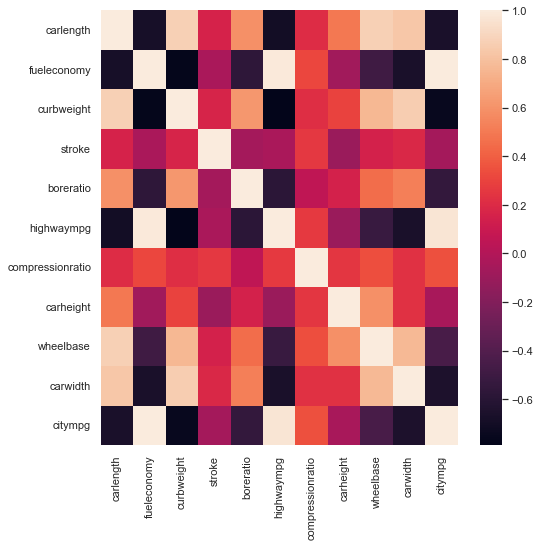

In [173]:
sns.heatmap(df[numerical_variables].corr())

## Data Pre-processing

#### Looking for missing valeus

In [174]:
df.isna()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    int64   
 2   CompanyName       205 non-null    object  
 3   fueltype          205 non-null    object  
 4   aspiration        205 non-null    object  
 5   doornumber        205 non-null    object  
 6   carbody           205 non-null    object  
 7   drivewheel        205 non-null    object  
 8   enginelocation    205 non-null    object  
 9   wheelbase         186 non-null    float64 
 10  carlength         193 non-null    float64 
 11  carwidth          189 non-null    float64 
 12  carheight         189 non-null    float64 
 13  curbweight        193 non-null    float64 
 14  enginetype        205 non-null    object  
 15  cylindernumber    205 non-null    object  
 16  enginesize        205 non-

####  Number and Percentage of missing values

In [176]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
boreratio,22,0.107317
wheelbase,19,0.092683
compressionratio,17,0.082927
carwidth,16,0.078049
carheight,16,0.078049
fueleconomy,15,0.073171
carlength,12,0.058537
curbweight,12,0.058537
citympg,9,0.043902
stroke,9,0.043902


* The data contains some null values which we will fill the null values values with mean further before running models on the data.

* All the missing values are numeric so we will replace them with mean

In [177]:
df['boreratio']=df['boreratio'].fillna(df['boreratio'].mean())
df['wheelbase']=df['wheelbase'].fillna(df['wheelbase'].mean())
df['compressionratio'] = df['compressionratio'].fillna(df['compressionratio'].mean())
df['carwidth']=df['carwidth'].fillna(df['carwidth'].mean())
df['carheight']=df['carheight'].fillna(df['carheight'].mean())
df['curbweight'] = df['curbweight'].fillna(df['curbweight'].mean())
df['carlength']=df['carlength'].fillna(df['carlength'].mean())
df['citympg']=df['citympg'].fillna(df['citympg'].mean())
df['stroke'] = df['stroke'].fillna(df['stroke'].mean())
df['highwaympg'] = df['highwaympg'].fillna(df['highwaympg'].mean())

In [178]:
df.isnull().sum()

car_ID               0
symboling            0
CompanyName          0
fueltype             0
aspiration           0
doornumber           0
carbody              0
drivewheel           0
enginelocation       0
wheelbase            0
carlength            0
carwidth             0
carheight            0
curbweight           0
enginetype           0
cylindernumber       0
enginesize           0
fuelsystem           0
boreratio            0
stroke               0
compressionratio     0
horsepower           0
peakrpm              0
citympg              0
highwaympg           0
price                0
fueleconomy         15
carsrange            0
dtype: int64

#### Checking for missing numbers again

In [179]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
fueleconomy,15,0.073171
car_ID,0,0.000000
symboling,0,0.000000
price,0,0.000000
highwaympg,0,0.000000
citympg,0,0.000000
peakrpm,0,0.000000
horsepower,0,0.000000
compressionratio,0,0.000000
stroke,0,0.000000


#### Dropping numeical variables with zero varaince

In [180]:
#identify numerical and categorical variables

numerical_variables = list(set(df.select_dtypes(include = float).columns) -set(['price'])) 
categorical_variables = list((df.dtypes[df.dtypes == object].index))

In [181]:
#Drop numerical variables with 0 variance

zero_variance_numerical_variables = []
for i in numerical_variables:
    if df[i].std() == 0:
        zero_variance_numerical_variables.append(i)
    
df = df.drop(zero_variance_numerical_variables, axis = 1)

In [182]:
df.std()

C:\Users\mitta\AppData\Local\Temp/ipykernel_23440/3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


car_ID                59.322565
symboling              1.245307
wheelbase              5.598940
carlength             11.905999
carwidth               2.061770
carheight              2.357403
curbweight           503.690209
enginesize            41.642693
boreratio              0.249516
stroke                 0.310264
compressionratio       3.927068
horsepower            39.544167
peakrpm              476.985643
citympg                6.347881
highwaympg             6.749934
price               7988.848977
fueleconomy            6.612759
dtype: float64

### Dropping Categorical Variables with Zero variance


In [183]:
categorical_variables

['CompanyName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [184]:
#Drop categorical variables with 0 variance
zero_variance_categorical_variables = [] 
for i in categorical_variables:
    if len(df[i].value_counts().index) == 1:
        zero_variance_categorical_variables.append(i)

df = df.drop(zero_variance_categorical_variables, axis = 1) 

In [185]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.8,64.100000,53.789418,2548.0,dohc,four,130,mpfi,3.470000,2.680000,9.0,111,5000,25.117347,30.86802,13495,NaN,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.8,65.974074,48.800000,2548.0,dohc,four,130,mpfi,3.470000,3.259286,9.0,111,5000,21.000000,27.00000,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.500000,171.2,65.500000,52.400000,2823.0,ohcv,six,152,mpfi,2.680000,3.470000,9.0,154,5000,19.000000,26.00000,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.800000,176.6,66.200000,54.300000,2337.0,ohc,four,109,mpfi,3.190000,3.400000,10.0,102,5500,24.000000,30.00000,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,98.671505,176.6,66.400000,54.300000,2824.0,ohc,five,136,mpfi,3.329235,3.400000,8.0,115,5500,18.000000,22.00000,17450,19.80,Medium


### Dropping Categorical Variables with many levels

In [186]:
#Drop high cardinality variables
high_cardinality_categorical_variables = [] 
categorical_variables = list(set(categorical_variables) - set(zero_variance_categorical_variables))
for i in categorical_variables:
    if len(df[i].value_counts().index)>200:
        high_cardinality_categorical_variables.append(i)
df = df.drop(high_cardinality_categorical_variables, axis = 1)

### Scalling

In [187]:
from sklearn.preprocessing import StandardScaler
#Drop zero variance variables from numerical variables
numerical_variables = list(set(numerical_variables) - set(zero_variance_numerical_variables))

# Convert to numpy array
array = df[numerical_variables].values 

# Create standarization instance
data_scaler = StandardScaler().fit(array) 

# Standardize the numerical variables
data_rescaled = pd.DataFrame(data_scaler.transform(array), columns = numerical_variables)

df = df.drop(numerical_variables, axis = 1)

df = pd.concat([df, data_rescaled], axis=1)

In [188]:
#Create dummy variables
#Drop variables with high variance from categorical variables
categorical_variables = list(set(categorical_variables) - set(high_cardinality_categorical_variables))

# Create dummy variables
dummy_variables = pd.get_dummies(df[categorical_variables], drop_first=True) 

# Drop categorical variables from df
df = df.drop(categorical_variables, axis = 1) 

# Add dummy variables to df
df = pd.concat([df, dummy_variables], axis = 1) 

In [189]:
df["price"]=df["price"].astype(int)

In [190]:
#Split the dataset
input_variables = list(set(df.columns) - set(['price']))

X = df[input_variables]
Y = df['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 233)

### Fitting Models

 ## Feature Selection for our model

* Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

In [205]:
df

,car_ID,symboling,enginesize,horsepower,peakrpm,price,carsrange,carlength,citympg,curbweight,stroke,boreratio,highwaympg,compressionratio,carheight,wheelbase,carwidth,fueleconomy,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear,doornumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd,fueltype_gas,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,aspiration_turbo,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,130,111,5000,13495,Medium,-4.642607e-01,5.610393e-16,-0.004145,-1.871644e+00,5.655331e-01,0.000000,-3.326880e-01,1.812882e-14,-1.803227e+00,-9.111887e-01,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,130,111,5000,16500,Medium,-4.642607e-01,-6.502053e-01,-0.004145,-1.865280e-14,5.655331e-01,-0.574448,-3.326880e-01,-2.121671e+00,-1.803227e+00,-6.909423e-15,-0.603098,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,152,154,5000,16500,Medium,-2.621882e-01,-9.660424e-01,0.543162,6.808078e-01,-2.608346e+00,-0.722961,-3.326880e-01,-5.908279e-01,-7.468765e-01,-2.304983e-01,-0.838112,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,2,109,102,5500,13950,Medium,1.924749e-01,-1.764498e-01,-0.424079,4.546411e-01,-5.593860e-01,-0.128912,-7.742171e-02,2.171169e-01,2.020484e-01,1.098469e-01,-0.148231,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,2,136,115,5500,17450,Medium,1.924749e-01,-1.123961e+00,0.545152,4.546411e-01,1.784159e-15,-1.317010,-5.879542e-01,2.171169e-01,-2.544346e-15,2.070883e-01,-1.194425,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,6,2,136,110,5500,15250,Medium,2.514128e-01,-9.660424e-01,0.000000,4.546411e-01,-5.593860e-01,-0.871473,-4.603211e-01,-2.931640e-01,-2.544346e-15,-6.909423e-15,-0.906342,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,7,1,136,110,5500,17710,Medium,1.548045e+00,-9.660424e-01,0.584956,4.546411e-01,-5.593860e-01,-0.871473,-4.603211e-01,8.124446e-01,1.276303e+00,2.638125e+00,-0.906342,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,8,1,136,110,5500,18920,Medium,1.548045e+00,-9.660424e-01,0.803879,4.546411e-01,-5.593860e-01,-0.871473,-4.603211e-01,8.124446e-01,1.276303e+00,2.638125e+00,-0.906342,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,9,1,131,140,5500,23875,Medium,1.548045e+00,-1.281879e+00,1.066586,4.546411e-01,-8.004400e-01,-1.614034,-5.113744e-01,8.974914e-01,1.276303e+00,2.638125e+00,-1.414277,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
9,10,0,131,160,5500,17859,Medium,7.179058e-15,-1.439798e+00,1.000909,4.546411e-01,-8.004400e-01,-1.317010,-8.432205e-01,1.812882e-14,-2.544346e-15,-6.909423e-15,-1.361209,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [203]:
numerical_cols=df.select_dtypes(exclude=['object']).columns
X=df[numerical_cols].drop('price',axis=1)
y=df['price']

#### Recursive feature elimination (RFE) with random forest

In [207]:
X = df.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X=X.drop(['price'],axis=1)
y=df['price']

#### Create the RFE object and rank each pixel

In [208]:
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])

Chosen best 15 feature by rfe: Index(['car_ID', 'enginesize', 'horsepower', 'peakrpm', 'carlength', 'citympg',
       'curbweight', 'boreratio', 'highwaympg', 'compressionratio',
       'carheight', 'wheelbase', 'carwidth', 'fueleconomy', 'CompanyName_bmw'],
      dtype='object')


In [209]:
features=list(X.columns[rfe.support_])

### Data Modelling and Evaluation

In [210]:
x = X[features]
y = df.price
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

##### Linear Regression

In [211]:
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)
print("{:.2%}".format(lreg.score(x_test,y_test)))


70.61%


##### Decision Tree Regressor

In [212]:
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train,y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
dt_regressor.score(x_test,y_test)
print("{:.2%}".format(dt_regressor.score(x_test,y_test)))

83.57%


##### Random Forest regressor

In [213]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)

print("{:.2%}".format(r2_score(y_test,Rf_test_pred)))

87.25%


* We applied three models Linear Regression Decision Tree Regressor,and RandomForest Regressor
* As we can see random forest performing best (with accuracy ~ 0.90)